# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [3]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1[:10]

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,31.92,35.01,10.25,4.06,17.6,36.3
2,140,4.96,36.41,16.70,6.13,3.80,13.2,35.6
3,136,3.66,41.43,13.17,5.86,4.26,16.2,43.7
4,136,4.74,23.92,30.33,10.80,4.83,16.1,49.8
5,140,4.74,43.66,20.44,6.59,4.05,12.6,39.1
6,146,3.98,48.41,33.22,4.53,4.04,17.9,47.3
7,144,5.29,44.29,19.28,10.12,3.96,17.2,47.9
8,138,4.57,50.43,16.39,4.66,4.91,13.7,41.5
9,144,3.96,31.51,34.87,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [154]:
# Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
y_pred_KMeans1 = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(EMR3d1)
print(y_pred_KMeans1.labels_)
labels = y_pred_KMeans1.labels_
print(y_pred_KMeans1.cluster_centers_)

[4 3 1 2 3 1 4 0 1 1 2 3 1 2 3 1 4 0 1 1 4 0 1 4 3 1 4 3 1 1 4 3 1 2 3 1 2
 3 1 1 4 3 1 4 0 1 4 3 1 1 2 3 1 4 0 1 2 3 1 1 2 0 1 2 3 1 2 3 1 1 2 0 1 4
 3 1 4 3 1 1 2 0 1 4 0 1 4 3 1 1 4 0 1 4 0 1 4 3 1 1]
[[ 4.77636364  4.41636364 12.72727273]
 [ 3.8395      5.433      16.6075    ]
 [ 4.79583333 10.5175     15.39166667]
 [ 4.88315789  5.92105263 12.84210526]
 [ 4.92055556 10.35611111 17.11111111]]


### Make a 3D chart

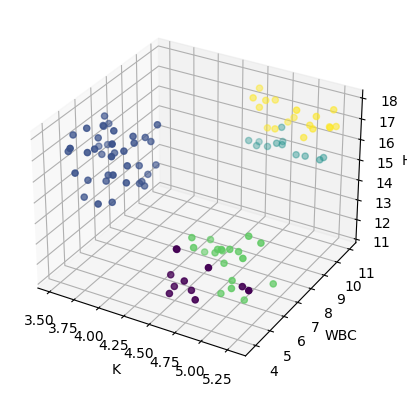

In [155]:
def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()

    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, labels, variables1)

## Task 1 (_max score - 50 points_)
Implement  Lloyd's Algorithm for solving the K-Means problem, as shown in class.
By examining the WCSS, choose a proper threshold to determine algorithm convergence.

Check your algorithm on 'EMR-Blood.xlsx' dataset. Compare your results to the _sklearn_ version - what can affect any differences you might've got?

In [148]:
from ctypes import pointer
# Add your code for task1 after this line, and keep it in this cell.

# Implement K-Means (X being the data)
class k_means:
    def __init__(self, k, random_state=1, num_iter=10, min_distance=1e-4):
        self.k = k
        self.num_iter = num_iter
        self.min_distance = min_distance
        self.random_state = random_state

    def coner_centroids(self,X):
      min_max_X = np.array([X.T.min(axis=1), X.T.max(axis=1)])
      p = X.shape[1]
      binary = []
      for i in range(2**p):
          binary.append(list(format(i, f'0{p}b')))
      binary = np.array([eval(i) for l in binary for i in l]).reshape(-1,p)
      np.random.shuffle(binary)
      print(p, self.k)
      if 2 ** p >= self.k:
        return min_max_X.T[np.arange(p),binary[:self.k]]
      else:
        x = []
        for i in range(p):
            x.append(np.random.uniform(low=min_max_X[0,i],high=min_max_X[1,i], size=(self.k - 2 ** p)))
        x = np.array(x).T
        x = np.concatenate((x,min_max_X.T[[0,1,2],binary]), axis=0)
        return x

    def kmeanspp_centroids(self, X):
      np.random.seed(self.random_state)
      centroids = []
      centroid_id = np.random.choice(X.shape[0])
      centroids.append(X[centroid_id])
      for _ in range(self.k-1):
        dists = []
        for x in X:
            distances = np.sqrt(np.sum((x-centroids)**2,axis=1))
            dists.append(distances.min())
        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)
      return np.array(centroids)

    def random_centroids(self, X):
      p = X.shape[1]
      min_max_X = np.array([X.T.min(axis=1), X.T.max(axis=1)])
      x = []
      for i in range(p):
          x.append(np.random.uniform(low=min_max_X[0,i],high=min_max_X[1,i], size=(self.k)))
      x = np.array(x).T
      return x



    def fit(self, X):
        p = X.shape[1]
        k = self.k
        num_iter = self.num_iter
        min_distance = self.min_distance

        centroids = self.kmeanspp_centroids(X)
        #centroids = self.corner_centroids(X)
        #centroids = self.random_centroids(X)

        new_centroids = centroids.copy()

        n=0
        d_old = 100000000

        while (n == 0)|((n <50)):
          belong_to_centroid = []
          d = 0
          for x in X:
            distances = np.sqrt(np.sum((new_centroids-x)**2,axis=1))
            belong_to_centroid.append(np.argmin(distances))
            d += np.min(np.sqrt(np.sum((new_centroids-x)**2,axis=1)))


          new_centroids2=np.ones((1,p))

          for cluster in np.arange(k):
            new_centroid = np.mean(X[np.argwhere(belong_to_centroid==cluster)], axis=0)
            new_centroids2 = np.concatenate((new_centroids2,new_centroid), axis=0)

          print(new_centroids)
          new_centroids = new_centroids2[1:]
          n += 1
          if d == d_old:
            self.centroids = new_centroids
            self.belong_to_centroid = belong_to_centroid
            return belong_to_centroid
          d_old =d

        self.belong_to_centroid = belong_to_centroid
        self.centroids = new_centroids
        print(belong_to_centroid)
        return centroids



    def predict(self, X):
        pass

[[ 3.78  4.69 17.3 ]
 [ 5.16 10.77 15.2 ]
 [ 5.08  5.69 11.3 ]
 [ 4.57  9.92 17.8 ]
 [ 5.04  6.24 14.  ]]
[[ 3.81085714  5.31828571 16.78571429]
 [ 4.82428571 10.56571429 15.55714286]
 [ 4.87533333  5.04266667 12.2       ]
 [ 4.91125    10.29375    17.18125   ]
 [ 4.6195      5.831      13.89      ]]
[[ 3.81777778  5.35861111 16.75555556]
 [ 4.79583333 10.5175     15.39166667]
 [ 4.87875     4.995625   12.2875    ]
 [ 4.92055556 10.35611111 17.11111111]
 [ 4.63333333  5.86444444 13.80555556]]
[[ 3.82894737  5.39       16.67894737]
 [ 4.79583333 10.5175     15.39166667]
 [ 4.87875     4.995625   12.2875    ]
 [ 4.92055556 10.35611111 17.11111111]
 [ 4.70875     5.853125   13.61875   ]]
[[ 3.8395      5.433      16.6075    ]
 [ 4.79583333 10.5175     15.39166667]
 [ 4.89933333  4.89133333 12.28666667]
 [ 4.92055556 10.35611111 17.11111111]
 [ 4.78866667  5.84733333 13.31333333]]
[[ 3.8395      5.433      16.6075    ]
 [ 4.79583333 10.5175     15.39166667]
 [ 4.87538462  4.69615385 12.292

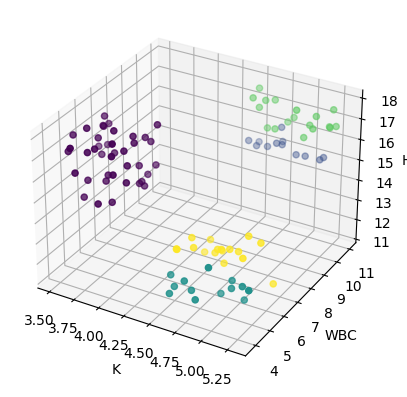

In [153]:
model = k_means(5,random_state=15)
model.fit(EMR3d1)
labels2 = model.belong_to_centroid
#print(labels2)
#print(y_pred_KMeans1.cluster_centers_)
make_chart(EMR3d1, labels2, variables1)

## Task 2 (_max score - 30 points_)

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Choose a proper K based on the heuristics learned in class
3. Showing the final clusters in a 3D chart (for your implementation of K-Means algorithm)

In [ ]:
# Add your code for task2 after this line, and keep it in this cell.




### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

In [ ]:
# Add your code for the Sillhouette graphic analysis
# You can use scikit-learn Sillhouette page as a reference

from sklearn.metrics import silhouette_samples, silhouette_score

def plot_Silhouette(X, y, num_clusters):
    # YOUR CODE HERE
    pass


#### From this section on - please use the sklearn's K-means

## Part 2: Mixture Models Clustering

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

In [ ]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["AST","ALT","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm
# NOTICE, this time, we know that the correct number of clusters is 2
y_pred_KMeans2 = # YOUR CODE HERE

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

## Task 3 (_max score - 20 points_)
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena.

What is the "problem" with this separation?

In [ ]:
# Your answer here


In order to exploit the Gaussian characteristic of the AST
1. Find the 2 componenets that comprise the AST feature by applying the GMM algorithm with the proper number of components.
2. Assume that the clusters above are correct for the entire dataset (including the other features).
3. Show the final clusters (of EMR3d2) in a 3D chart

In [ ]:
# Add your code for task3 after this line, and keep it in this cell.




What is the difference between the two clustering results above?

Which one, given the domain knowledge provided to you, makes more sense?




# Good Luck!

